# Mandatory assignment 1



IN5400 / IN9400 - Machine Learning for Image Analysis<br>
University of Oslo<br>
Spring 2020<br>
  
  
Handout: 2020.02.10<br>
Delivery deadline: 2020.03.02


## Submission

Create a zip-file with all code from the main directory, except the data set. Upload the zip-file to devilry.ifi.uio.no

## Important information

Note that this exercise is individual work. You are required to follow regulations for mandatory assignments at IFI.
Your code will be checked against plagiarism. 

Also note that you are required to implement the function in the code without using Pytorch or other prebuilt functions for network initialization or propagation. 

## About

This mandatory assignment consist of two parts: one implementing a dense neural network for image classification, and one implementing convolutional layers. Information about the two parts is under their respective subheadings. Read the content thoroughly.

This assignment can be implemented either at the Linux-computers at IFI, or by using Anaconda Python3 and Jupyter Notebook on your own laptop. It is not computationally heavy. 

### Notebook set up

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def compare_result(expected, proposed, name):
    """Compares the expected result agains the proposed result and prints some information"""
    if proposed is None:
        print("The {} does not seem to be implemented yet.".format(name))
        return
    if np.allclose(expected, proposed):
        print("Correct {}!".format(name))
    else:
        print("This does not seem entirely correct.")
        print("This could mean that there is something wrong with the implementation of {}.".format(name))
        print("The difference between expected and proposed result is")
        print(expected - proposed)
        
def rel_error(x, y):
    """Returns the relative error between input x and y"""
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

## Part 1: Image classification with deep learning and dense neural networks

In this exercise, you are supposed to implement a basic neural network for image classification. The network will be densly connected, with an arbitrary number of layers, and number of nodes in each layer. We shall implement a ReLu activation function, and use a softmax activation in the last layer. The error will be measured with a cross-entropy loss function, and the cost will be minimized using a stochastic gradient descent optimization routine.


### Evaluation format

You will be guided through the implementation step by step, and you can check your implementation at each step. Each subtask will be judged independently, so it should be possible to do one task even if you have not succeded in the previous. Note, however, that each step needs to be correct in order for the whole method to work at the end.

### Exercise content

- All subtasks that you are to answer is found in this notebook.
- In addition, there is a `dnn` folder that contains a skeleton for the classifier, including a complete way to import data.
- All implementation should be done in the respective files in the `dnn` folder

```
def implement_this_function(argument_1):
    """This is an illustrative dummy function"""
    # TODO: Task X.Y
    result = None
    
    return result
```
- Some function headers are already given, and necessary, as they are called by the subtasks in this notebook.
- Everything else you feel you need to implement, you can implement as you like.
- When you have implemented everything (correctly), you should be able to run the whole classifier as `python dnn/main.py`
- Suggestion about the values of different hyperparameters will be given, but you are encouraged to experiment in the final subtask.

### What you should implement

The skeleton of this program that is already implemented contains things such as:
- Program setup
- Configurations
- Data import of three datasets: mnist, cifar10, and svhn
- Training framework
- Evaluation framework

You should implement the content in the training framework. All steps will be given as tasks and subtasks below. The following are *you* supposed to implement.
1. Parameter initialization
2. Forward propagation through a network with *arbitrary number of layer* where each layer has an *arbitrary number of nodes*
  1. ReLu activation function
  2. Softmax function
  3. The rest of the forward propagation
3. Cross Entropy cost function
4. Backward propagation through network with *arbitrary number of layer* where each layer has an *arbitrary number of nodes*
  1. Derivative of the ReLu activation function
  2. The rest of the backwar propagation
5. Parameter update using Gradient Descent optimization
6. Run the finished method
  1. Reproduce result with default settings
  2. Exceed the default result by experimenting with different hyperparameter configurations.


### Additional notes

Most variables should be self-explanatory, but there are four important dictionaries worth mentioning, as they will control the data flow of the entire program

- `conf`: Contains all configurations of the program. These configurations will be passed around most functions, even though we most often will only need a couple of them; this is so that you are freer to experiment outside the boundaries of the program skeleton. They are set with some default values in the `config()` function in `dnn/main.py`.
- `params`: Contains all trainiable parameters, that is, all weight and bias arrays.
- `grads`: Contains the gradients of the respective trainable parameters.
- `features`: Contains input and output data, in addition to linear combination arrays `Z` and activation arrays `A`.

It is *strongly* encouraged to implement the vectorized version of things, otherwise, things are to slow.

This should be it. Let us begin.


### Task 1.1: Parameter initialization

We will see in the lecture on training neural networks that the way we initialize the weights will be important for efficient training. The weights should be initialized to small, different random numbers drawn from a Gaussian distribution with zero mean and given variance. The numbers should also be scaled. The scaling factor depends on the activation function used. With ReLU activations, we use He initialization as given below.  

The function you are to implement is `initialization(layer_dimensions)`, located in `dnn/model.py`. The parameters shall have the following shape

$$
\begin{aligned}
    W^{[l]} &\in \mathbb{R}^{n^{[l-1]}\times n^{[l]}} \\
    b^{[l]} &\in \mathbb{R}^{n^{[l]}}
\end{aligned}
$$

and have the following values

$$
\begin{aligned}
    W_{jk}^{[l]} &\sim \mathcal{N}\left(0, \frac{2}{n^{[l-1]}}\right) \\
    b_k^{[l]} &= 0
\end{aligned}
$$

for all $j = 1, \ldots, n^{[l-1]}$, $k = 1, \ldots, n^{[l]}$, $l = 1, \ldots, L$. Here $x \sim \mathcal{N}(\mu, \sigma^2)$ means that $x$ is sampled from a normal (or gaussian) distribution with mean $\mu$ and variance $\sigma^2$. In order to achieve the normal sampling in python, you can use the `numpy.random.normal()` function.  

Note that $b^{[l]}$ should have dimension $[n_l,1]$, not just $[n_l]$.

This initialization fits well with ReLu activations, and is proposed in [He et al. (2015)](https://arxiv.org/pdf/1502.01852.pdf). For another common initialization scheme, you can study the paper by [Glorot and Hinton (2010)](http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf).

The purpose of this initialization will be to let the weights in all layers be initialized with random numbers with equal variance for all layers.

In [2]:
# Import the function you have implemented
from dnn.model import initialization

# This dummy network has 784 input nodes, two hidden layers with 128 and 32 nodes, respectively, and
# an output layer with 10 nodes
conf = {'layer_dimensions': [784, 128, 32, 10]}

# You should implement this function
params = initialization(conf)
# params should be a dictionary with elements for the weights and biases for the network given in conf above.
# In this example this will be a 2-layer network with 128 nodes in the first hidden layer and 32 nodes in the 
# second hidden layer, and with 10 classes in the output layer.
# The names should be W_j and b_j for layer j

# Check your results against the expected. Note that since we are dealing with (pseudo) randomness and
# small samples, the values of your array may differ some from the expected. But the absolute difference
# should not be very much larger than the order of 0.0001 for W_1, 0.001 for W_2, and 0.01 for W_3.
for key, value in sorted(params.items()):
    print("{}".format(key))
    print("    Shape = {}".format(value.shape))
    if key[0] == "W":
        n_lm1 = value.shape[0]
        print("    Mean: {0:>9.6f} vs {1:>9.6f} Abs diff: {2:>9.6f}".format(np.mean(value),
                                                                            0.0,
                                                                            np.abs(np.mean(value) - 0.0)))
        print("     Std: {0:>9.6f} vs {1:>9.6f} Abs diff: {2:>9.6f}".format(np.std(value),
                                                                            np.sqrt(2/n_lm1),
                                                                            np.abs(np.std(value) - np.sqrt(2/n_lm1))))
    else:
        print("     Min: {} vs {}".format(np.min(value), 0.0))
        print("     Max: {} vs {}".format(np.max(value), 0.0))

W_1
    Shape = (784, 128)
    Mean:  0.000041 vs  0.000000 Abs diff:  0.000041
     Std:  0.015612 vs  0.050508 Abs diff:  0.034896
W_2
    Shape = (128, 32)
    Mean:  0.001679 vs  0.000000 Abs diff:  0.001679
     Std:  0.061535 vs  0.125000 Abs diff:  0.063465
W_3
    Shape = (32, 10)
    Mean: -0.004717 vs  0.000000 Abs diff:  0.004717
     Std:  0.208510 vs  0.250000 Abs diff:  0.041490
b_1
    Shape = (128, 1)
     Min: 0.0 vs 0.0
     Max: 0.0 vs 0.0
b_2
    Shape = (32, 1)
     Min: 0.0 vs 0.0
     Max: 0.0 vs 0.0
b_3
    Shape = (10, 1)
     Min: 0.0 vs 0.0
     Max: 0.0 vs 0.0


### Task 1.2: Forward propagation

In this task, you shall implement a ReLu activation function and a softmax function, in addition to the rest of the forward propagation. You must figure out yourself when and how to use the softmax and ReLu functions.

Use the tricks for numerical stability introduced in the lecture notes. 

#### 1.2 a): ReLu activation function

The rectified linear unit has the following form

$$
g(x) =
\begin{cases}
  x, &\quad x \ge 0 \\
  0, &\quad x < 0.
\end{cases}
$$

and is supposed to be used as an activation function in all nodes, in all hidden layers.

In [3]:
# Import the function you have implemented
from dnn.model import activation
from dnn.tests import task_2a

# First, we load the dummy input, and the expected output
input_Z, expected_A = task_2a()

# You should implement this function
A = activation(input_Z, 'relu')

# Check the result
compare_result(expected_A, A, "Relu activation")

Correct Relu activation!


#### 1.2 b): Softmax function

The $k$th element of a softmax function evaluated on a vector $x \in \mathbb{R}^n$ is given by

$$
s(x)_k = \frac{e^{x_k}}{\sum_{j=1}^n e^{x_j}}
$$

and is supposed to be used on the linear activations in the last layer. When this function is to be used on "real data", it is adviced to implement the "tricks" introduced in lecture 3, to guard against numerical instability.

In [4]:
# Import the function you have implemented
from dnn.model import softmax
from dnn.tests import task_2b

# First, we load the dummy input and the expected output
input_Z, expected_S = task_2b()

# You should implement this function. Note that we often also use Ŷ to symbolise the output of the network.
S = softmax(input_Z)

# Check the result
compare_result(expected_S, S, "softmax")

Correct softmax!


#### 1.2 c): Forward propagation

In this task, you shall implement the forward propagation, from data input to softmax output. This means that you will need the above two functions. This also means that the correctness of this task is dependent on the correctness of the relu and softmax task above. This is a bit unfortunate, as this should ideally be a standalone task, but I believe that the ReLu and softmax functions are simple enough that this should not be a very large problem.

The forward propagation should be able to handle an arbitrary number of layers and nodes, determined by the `conf['layer_dimensions']` parameter. It should also handle a batch of inputs.

In [5]:
# Import the function you have implemented
from dnn.model import forward
from dnn.tests import task_2c

# We load the input and expected output
conf, X_batch, params, expected_Z_1, expected_A_1, expected_Z_2, expected_Y_proposed = task_2c()


# Implement this function yourself
Y_proposed, features = forward(conf, X_batch, params, is_training=True)

compare_result(expected_Z_1, features['Z_1'], "feature Z_1")
compare_result(expected_A_1, features['A_1'], "feature A_1")
compare_result(expected_Z_2, features['Z_2'], "feature Z_2")
compare_result(expected_Y_proposed, Y_proposed, "proposed Y")

Correct feature Z_1!
Correct feature A_1!
Correct feature Z_2!
Correct proposed Y!


### Task 1.3: Cross Entropy cost function

Given a batch of predicted outputs $\hat{Y} = (\hat{y}_1, \ldots, \hat{y}_m)$ and a batch of reference (one-hot encoded) outputs $\tilde{Y} = (\tilde{y}_1, \ldots, \tilde{y}_m)$, such that
$\hat{y}^{(i)}, \tilde{y}^{(i)} \in \mathbb{R}^n$ for $i = 1, \ldots, m$, the cross entropy cost is given by

$$
C(\hat{Y}, \tilde{Y}) = -\frac{1}{m}\sum_{i=1}^m\sum_{k=1}^{n} \tilde{y}_k^{(i)}\log \hat{y}_k^{(i)}.
$$

In [6]:
# Import the function you have implemented
from dnn.model import cross_entropy_cost
from dnn.tests import task_3

# Generate some dummy input and corresponding expected output
Y_proposed, Y_batch, expected_cost_value, expected_num_correct = task_3()


# You should implement this function
cost_value, num_correct = cross_entropy_cost(Y_proposed, Y_batch)


compare_result(expected_cost_value, cost_value, "cost value")
compare_result(expected_num_correct, num_correct, "number of correct predictions")

Correct cost value!
Correct number of correct predictions!


### Task 1.4: Backward propagation

In this task, you shall compute the gradients of the trainable parameters with respect to the cost value. In order to compute them, we will need the following equations.

$$
\begin{aligned}
  \nabla_{W^{[l]}} \mathcal{C} &= \frac{1}{m} A^{[l-1]} \mathcal{J}_{z^{[l]}}{(\mathcal{C})}^\intercal \\
  \nabla_{b^{[l]}} \mathcal{C} &= \frac{1}{m}\left( \mathcal{J}_{z^{[l]}}{(\mathcal{C})} \right) \mathbf{1}(m) \\
  \mathcal{J}_{z^{[l]}}{(\mathcal{C})}&=g'(Z^{[l]})\circ \left(W^{[l+1]} \mathcal{J}_{z^{[l+1]}}{(\mathcal{C})}\right) \\
  \mathcal{J}_{z^{[L]}}{(\mathcal{C})} &= \hat{Y} - \tilde{Y}.
\end{aligned}
$$

We refer to the [lecture slides](https://www.uio.no/studier/emner/matnat/ifi/IN5400/v20/material/lectureslides/in5400_lecture3_nnet_290120.pdf) for the derivation and explanation of the different terms.

#### 1.4 a): Derivative of the activation function

In order to compute the parameter gradients, we need a function to compute the derivative of the relu activation function. If we take some freedoms, we can use the Heaviside step-function as the derivative of the ReLu activation

$$
g'(x) =
\begin{cases}
  1, &\quad x \ge 0 \\
  0, &\quad x < 0.
\end{cases}
$$

Implement the function activation_derivative in model.py

In [7]:
# Import your function
from dnn.model import activation_derivative
from dnn.tests import task_4a

# Load dummy input and expected output
input_Z, expected_dg_dz = task_4a()

# You should implement this
dg_dz = activation_derivative(input_Z, "relu")

# Compare your result with the expected
compare_result(expected_dg_dz, dg_dz, "activation function derivative")

Correct activation function derivative!


#### 1.4 b): Backward propagation

Use the equations above, and the function you implemented in Task 4 a) to compute all necessary parameter gradients.

Complete the function backward in model.py.

Create a dictionary gram_params with the an entry for each layer for W and b, like in the example: 

grad_params['grad_W_1']

grad_params['grad_W_2']

grad_params['grad_b_1']

grad_params['grad_b_2']



In [8]:
# Import your function
from dnn.model import backward
from dnn.tests import task_4b

# Load dummy input and expected output
(conf, Y_proposed, Y_batch, params, features,
 expected_grad_W_1, expected_grad_b_1, expected_grad_W_2, expected_grad_b_2) = task_4b()


# This is the function that you shall implement
grad_params = backward(conf, Y_proposed, Y_batch, params, features)

# Check your implementation
compare_result(expected_grad_W_1, grad_params['grad_W_1'], "gradient of cost w.r.t. W_1")
compare_result(expected_grad_b_1, grad_params['grad_b_1'], "gradient of cost w.r.t. b_1")
compare_result(expected_grad_W_2, grad_params['grad_W_2'], "gradient of cost w.r.t. W_2")
compare_result(expected_grad_b_2, grad_params['grad_b_2'], "gradient of cost w.r.t. b_2")

Correct gradient of cost w.r.t. W_1!
Correct gradient of cost w.r.t. b_1!
Correct gradient of cost w.r.t. W_2!
Correct gradient of cost w.r.t. b_2!


### Task 1.5: Update parameters

Given some learning rate $\lambda \in \mathbb{R}$, the gradient descent update is given by

$$
\begin{aligned}
  w_{jk}^{[l]} &\gets w_{jk}^{[l]} - \lambda \frac{\partial \mathcal{C}}{\partial w_{jk}^{[l]}} \\
  b_k^{[l]}    &\gets b_k^{[l]} - \lambda \frac{\partial \mathcal{C}}{\partial b_k^{[l]}}
  \end{aligned}
$$

for all

$$
\begin{cases}
  j &= 1, \ldots, n^{[l-1]} \\
  k &= 1, \ldots, n^{[l]} \\
  l &= 1, \ldots, L
\end{cases}
$$


Note that the learning rate is given in conf

In [9]:
# Import your function
from dnn.model import gradient_descent_update
from dnn.tests import task_5

# Load dummy input and expected output
(conf, params, grad_params,
 expected_updated_W_1, expected_updated_b_1, expected_updated_W_2, expected_updated_b_2) = task_5()


# You should implement this function
updated_params = gradient_descent_update(conf, params, grad_params)

# Check your results
compare_result(expected_updated_W_1, updated_params['W_1'], "update of W_1")
compare_result(expected_updated_b_1, updated_params['b_1'], "update of b_1")
compare_result(expected_updated_W_2, updated_params['W_2'], "update of W_2")
compare_result(expected_updated_b_2, updated_params['b_2'], "update of b_2")

Correct update of W_1!
Correct update of b_1!
Correct update of W_2!
Correct update of b_2!


### Task 1.6: Putting everything together

Now it is time to test our implementation on some data. In `dnn/import_data.py` there is automated scripts for importing the following datasets

- MNIST
- CIFAR10
- SVHN

These are chosen because they contain small images, and therefore easy to experiment with. Below, you will find results from training sessions on all datasets using the default configuration.




**Default configuration**

```
hidden_layers = [128, 32]
devel_size = 5000
activation_function = 'relu'
batch_size = 128
learning_rate = 1.0e-2
```

### How to report results

The most important is that you are able to present your findings in an understandable way. It is most convenient for everyone that you report your results in this notebook. Below follows three different suggestions of ways to do this.

**Method 1: Running program and manually copy/paste results here**

This is done in the examples below, and is nice because of the danger of overwriting things by accident is smaller. But beware that the notebook kernel often needs to be restarted (or similar) before changes are noticed.

To do this, some markdown formatting is worth explaining. You can find the jupyter notebook markdown cell specification at [here](http://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html)
Images can be linked to as follows

```
![caption name](relative/path/to/image.png)
```

and you can create monospaced blocks by enclosing the block with three "accent grave" symbols at the top and bottom of the block. The following block

will be rendered as

```
Cell content here
```

** Method 2: Running your program inside the notebook**

You can import the program here, and run the program. This is possibly the simplest, but be careful not to overwrite results. In order for this to work, you need to put the source directory in the python path.

In [10]:
import sys
import os

src_dir = os.path.join(os.getcwd(), "dnn")
if src_dir not in sys.path:
    sys.path.append(src_dir)

In [ ]:
# Import main and run
from dnn.main import main

main()


** Method 3: Running your program inside the notebook**

Instead of importing the `main()` function, you can copy/paste the content of `main()` here, and run things manually with the desired config. This is a bit verbose, but is less prone to overwrite existing results. For this method, you need to add the source directory to the python path as shown in **Method 2**.

dataset mnist
data_root_dir /tmp/data
input_dimension None
hidden_dimensions [128, 32]
output_dimension None
layer_dimensions None
devel_size 5000
activation_function relu
max_steps 2000
batch_size 128
learning_rate 0.01
verbose False
train_progress 10
devel_progress 100
Loading MNIST data from  /tmp/data/mnist
Run training
Number of training examples in one epoch:  55000
Start training iteration
Terminating training after 3000 steps


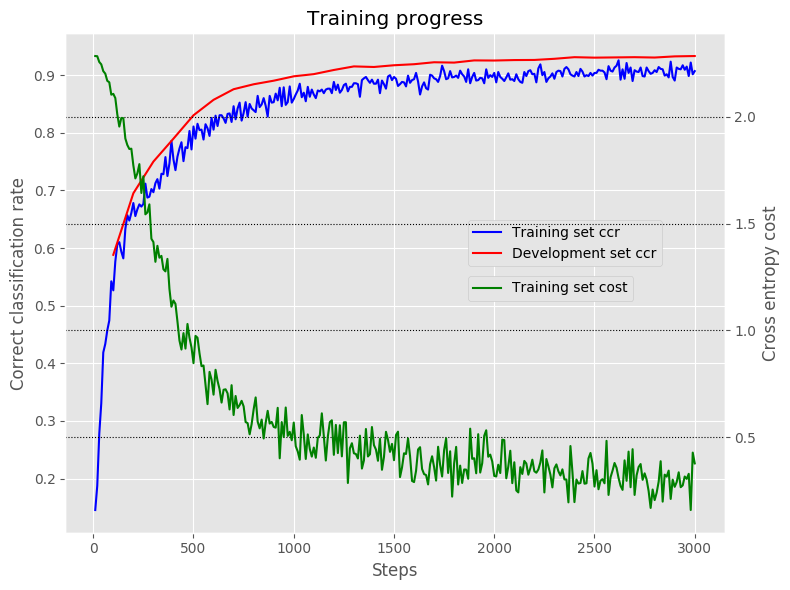

Evaluating train set
CCR = 50100 / 55000 = 0.9109
Evaluating development set
CCR =  4666 /  5000 = 0.9332
Evaluating test set
CCR =  9152 / 10000 = 0.9152


In [14]:
# Import the module

import dnn.main as main
import dnn.run as run

# Import config, and do changes if you want to
conf = main.config()

for key in conf:
    print(key, conf[key])

conf['max_steps'] = 3000
#conf['hidden_dimensions'] = [128, 64, 32]
#conf['dataset'] = "svhn" 
#conf['activation_function'] = "leaky relu"
#conf['learning_rate'] = 1.0e-3

X_train, Y_train, X_devel, Y_devel, X_test, Y_test = main.get_data(conf)

params, train_progress, devel_progress = run.train(conf, X_train, Y_train, X_devel, Y_devel)

main.plot_progress(train_progress, devel_progress)

print("Evaluating train set")
num_correct, num_evaluated = run.evaluate(conf, params, X_train, Y_train)
print("CCR = {0:>5} / {1:>5} = {2:>6.4f}".format(num_correct, num_evaluated,
                                                 num_correct/num_evaluated))
print("Evaluating development set")
num_correct, num_evaluated = run.evaluate(conf, params, X_devel, Y_devel)
print("CCR = {0:>5} / {1:>5} = {2:>6.4f}".format(num_correct, num_evaluated,
                                                 num_correct/num_evaluated))
print("Evaluating test set")
num_correct, num_evaluated = run.evaluate(conf, params, X_test, Y_test)
print("CCR = {0:>5} / {1:>5} = {2:>6.4f}".format(num_correct, num_evaluated,
                                                 num_correct/num_evaluated))


### Examples

Below is shown some examples using the default configurations.

#### MNIST - 2000 steps

![Example training progress](figures/mnist_progress_default.png)

```
Evaluating train set
CCR = 50173 / 55000 = 0.9122
Evaluating development set
CCR =  4668 /  5000 = 0.9336
Evaluating test set
CCR =  9158 / 10000 = 0.9158
```

#### CIFAR10 - 10000 steps

![Example training progress](figures/cifar10_progress_default.png)

```
Evaluating train set
CCR = 22475 / 45000 = 0.4994
Evaluating development set
CCR =  2336 /  5000 = 0.4672
Evaluating test set
CCR =  4632 / 10000 = 0.4632
```

#### SVHN - 10000 steps

![Example training progress](figures/svhn_progress_default.png)

```
Evaluating train set
CCR = 49392 / 68257 = 0.7236
Evaluating development set
CCR =  3576 /  5000 = 0.7152
Evaluating test set
CCR = 17691 / 26032 = 0.6796
```

## 1.6 a): Reproduce results


### Note that in this section you should show us that you can reproduce results like the curves given above

On all datasets, try to reproduce the results shown above in the examples, with the same configurations. Because of random initialization, it is not expected that the results are exactly the same, even if the implementation is exactly identical to the one used to produce the examples. Report the results in cells below this one.

### MNIST 3000 steps
![mnist](figures/mnist_reprod.png)
Evaluating train set\
CCR = 50030 / 55000 = 0.9096\
Evaluating development set\
CCR =  4663 /  5000 = 0.9326\
Evaluating test set\
CCR =  9153 / 10000 = 0.9153

### CIFAR10 10000 steps
![cifar10](figures/cifar10_reprod1.png)
Evaluating train set\
CCR = 22410 / 45000 = 0.4980\
Evaluating development set\
CCR =  2384 /  5000 = 0.4768\
Evaluating test set\
CCR =  4814 / 10000 = 0.4814

### SVHN 10000 steps
![svhn](figures/svhn_reprod.png)
Evaluating train set\
CCR = 47576 / 68257 = 0.6970\
Evaluating development set\
CCR =  3414 /  5000 = 0.6828\
Evaluating test set\
CCR = 17386 / 26032 = 0.6679

# 1 .6 b): Exceed results

## Note that in this section you are expected to shown your best results, hopefully better accuracy than our examples above. 

Experiment with different configurations and try to beat the classification results above. We expect you to experiment a bit, and to give an effort in improving the results, but you will not be judged by whether you managed to exceed the results or not.

Suggested things to edit are listed below. Some are available if you have implemented everything in this assignment correctly, others will need some extra implementation. 

- Out of the box
  - Step length (learning rate)
  - Number of layers
  - Number of nodes in the layers
  - Number of training steps
- Things you have to implement yourself
  - Activation function
  - Parameter initialization
  - Optimization routine
  - Data standardization
  
Report your results, in addition to the configuration used, in new cells directly below this one.

### MNIST 20000 steps
![mnist](figures/mnist_improved.png)
Evaluating train set\
CCR = 53312 / 55000 = 0.9693\
Evaluating development set\
CCR =  4859 /  5000 = 0.9718\
Evaluating test set\
CCR =  9633 / 10000 = 0.9633

### CIFAR10 30000 steps
![cifar10](figures/cifar10_improved.png)
Evaluating train set\
CCR = 26534 / 45000 = 0.5896\
Evaluating development set\
CCR =  2517 /  5000 = 0.5034\
Evaluating test set\
CCR =  5043 / 10000 = 0.5043

### SVHN 30000 steps
![svhn_i](figures/svhn_improved.png)
Evaluating train set\
CCR = 54552 / 68257 = 0.7992\
Evaluating development set\
CCR =  3896 /  5000 = 0.7792\
Evaluating test set\
CCR = 19887 / 26032 = 0.7639

# Part 2: Implement convolutional layers

In this part, we will consider the computations involved between two convolutional layers. It consist of two tasks, where the first concerns the forward propagation and the second the backward propagation. In both cases, a small introduction will be presented, before the subtasks. In all subtasks you are to implement some solutions, and the framework can be found in the `cnn` folder.

While we used vectorization in the implementation of fully connected networks, we recommend using simple for loops for the tasks in this notebook. The gap from a simple implementation using loops to an efficient fast implementation is particularly large in backpropagation, where simple vectorization can increase the memory demands a lot. 

All modern deep learning frameworks have automatic differentiation and convolution operators, so you will likely not implement it yourself "in real life". But we believe that trying to implement it here will give you a solid understanding of how it works behind the curtains.

### Task 2.1:  Convolution --- basic forward pass

The core of a convolutional network is the convolution operation. In this task, we consider a simple convolution from a layer $x$ with shape $(M, C_x, H_x, W_x)$ to a layer $y$ with shape $(M, C_y, H_y, W_y)$ using a set of filters $w$ with shape $(N, C_w, H_w, W_w)$. More specifically, $x$ is convolved with $N$ 3D filters $w_j, j=1, \ldots, N$, each with shape $(C_w, H_w, W_w)$. Channel $j$ in the output layer corresponding to example $i$ is computed as

$$
\mathtt{
y[i, j, :, :] = b[j] + \sum_{k=1}^{C_x} x[i, k, :, :] * w[j, k, :, :],
}
$$

where $\mathtt{b[j]}$ is a scalar bias, $\mathtt{x[i, k]}$ is channel $k$ of input layer $i$ with shape $(H_x, W_x)$, and $\mathtt{w[j, k, :, :]}$ is the $k$'th channel of filter $j$.

As can be seen, one 3D filter $\mathtt{w[j, :, :, :]}$ contributes to one channel in the output, and therefore $N = C_y$. A convolutional layer is given the name because $(\mathtt{*})$ is the 2D convolution operator, but to keep it simple, a 2D *correlation* is often used in stead, (which we will also do, although we will sometimes use the name convolution).

There will be a lot of indices to keep track of, and this is why we chose to use the more "programmatical" notation with square brackets in stead of subscripts for indices. We use the `python` notation where $\mathtt{a[:, :]}$ is the entire 2D matrix $a$.

!["Same" convolution with zero-padding](figures/convolution_same.png)
**Figure 2.1:** Convolution with zero-padding

With a quadratic filter $w$ with odd side lengths, each element of the correlation $\mathtt{y = x * w}$, is given as (with *zero-padding* $x$)

$$
\mathtt{
y[p, q] = \sum_{r=-K}^K \sum_{s=-K}^K x[p + r, q + s] w[r, s], \quad p=1, \ldots, H, \quad q=1, \ldots, W.
}
$$

In this case, both $x$ and $y$ has the shape $H\times W$, the padded version of $x$ has the shape
$(H+2K)\times (W+2K)$, and $w$ has the shape $(2K+1)\times (2K+1)$. See the figure above for an example where $H=W=4$ and $K=1$. We follow the convention by indexing the filter $w$ from $-K$ (inclusive) to $K$ inclusive with a centre pixel at $(0, 0)$. In this case, the activation function is the identity function, and you should zero-pad your input if necessary (the `numpy.pad` function can be of help here).

In the file `cnn/conv_layers.py`, implement the forward pass for the convolution layer in the function `conv_layer_forward`. The task is split into three, where the subtasks increase in generality. You should therefore only need to have one function with the same api in every subtask.

## 2.1 a) Basic case

As a first step, implement a forward convolution as is described above, with batch size and stride equal to one. It should, however, be generic over

- Input layer dimensions $(C_x, H_x, W_x)$
- Pad size
- Number of filters $N (= C_y)$
- Spatial filter dimensions $(H_w, W_w)$, but you can assume that both are equal to $2K + 1$


You can test your implementation by running the code below.

In [15]:
from cnn.conv_layers import conv_layer_forward

batch_size = 1
num_filters = 2

channels_x, height_x, width_x = 3, 4, 4
height_w, width_w = 3, 3

stride = 1
pad_size = 1

x_shape = (batch_size, channels_x, height_x, width_x)
w_shape = (num_filters, channels_x, height_w, width_w)

input_layer = np.linspace(-0.4, 0.3, num=np.prod(x_shape)).reshape(x_shape)
weight = np.linspace(-0.2, 0.3, num=np.prod(w_shape)).reshape(w_shape)
bias = np.linspace(-0.1, 0.2, num=num_filters)

output_layer = conv_layer_forward(input_layer, weight, bias, pad_size, stride)

correct_out = np.array(
    [[[[ 0.15470494,  0.28520674,  0.26826174,  0.14451626],   # y[0, 0, 0, :]
       [ 0.28745885,  0.47927338,  0.44816540,  0.25953031],   # y[0, 0, 1, :]
       [ 0.20956242,  0.35484143,  0.32373344,  0.17151746],   # y[0, 0, 2, :]
       [ 0.07288238,  0.14856283,  0.12403051,  0.03908872]],  # y[0, 0, 3, :]

      [[ 0.07425532,  0.04867523,  0.10001606,  0.15511441],   # y[0, 1, 0, :]
       [ 0.15335608,  0.17933360,  0.25065436,  0.26199920],   # y[0, 1, 1, :]
       [ 0.34860297,  0.46461662,  0.53593737,  0.44712967],   # y[0, 1, 2, :]
       [ 0.35662385,  0.45831794,  0.50207146,  0.41387796]]]] # y[0, 1, 3, :]
)

# Compare your output to ours
compare_result(output_layer, correct_out, "forward convolution")

Correct forward convolution!


## 2.1 b) Add stride

Extend your implementation to also handle striding.

Hint: Since it is not entirely obvious, the spatial dimensions of the output layer will be

$$
\begin{align}
H_y &= 1 + \frac{H_x + 2P - H_w}{S} \\
W_y &= 1 + \frac{W_x + 2P - W_w}{S} \\
\end{align}
$$

where $P$ is the pad size and $S$ is the stride.

You can test your implementation by running the code below.

In [16]:
from cnn.conv_layers import conv_layer_forward

batch_size = 1
num_filters = 2

channels_x, height_x, width_x = 3, 5, 5
height_w, width_w = 3, 3

stride = 2
pad_size = 1

x_shape = (batch_size, channels_x, height_x, width_x)
w_shape = (num_filters, channels_x, height_w, width_w)

input_layer = np.linspace(-0.4, 0.3, num=np.prod(x_shape)).reshape(x_shape)
weight = np.linspace(-0.2, 0.3, num=np.prod(w_shape)).reshape(w_shape)
bias = np.linspace(-0.1, 0.2, num=num_filters)

output_layer = conv_layer_forward(input_layer, weight, bias, pad_size, stride)

correct_out = np.array(
    [[[[ 0.15976543,  0.28564763,  0.15193269],   # y[0, 0, 0, :]
       [ 0.24134370,  0.39155788,  0.21031871],   # y[0, 0, 1, :]
       [ 0.05787863,  0.11354156,  0.02434472]],  # y[0, 0, 2, :]

      [[ 0.04671086,  0.03112188,  0.12561958],   # y[0, 1, 0, :]
       [ 0.24704233,  0.34768995,  0.34612953],   # y[0, 1, 1, :]
       [ 0.37853136,  0.50957675,  0.43173891]]]] # y[0, 1, 2, :]
)

# Compare your output to ours
compare_result(output_layer, correct_out, "forward convolution")

Correct forward convolution!


## 2.1 c) Add multiple examples

Extend your implementation to handle a batch size larger than one.

You can test your implementation by running the code below.

In [17]:
from cnn.conv_layers import conv_layer_forward

batch_size = 2
num_filters = 2

channels_x, height_x, width_x = 3, 5, 5
height_w, width_w = 3, 3

stride = 2
pad_size = 1

x_shape = (batch_size, channels_x, height_x, width_x)
w_shape = (num_filters, channels_x, height_w, width_w)

input_layer = np.linspace(-0.4, 0.3, num=np.prod(x_shape)).reshape(x_shape)
weight = np.linspace(-0.2, 0.3, num=np.prod(w_shape)).reshape(w_shape)
bias = np.linspace(-0.1, 0.2, num=num_filters)

output_layer = conv_layer_forward(input_layer, weight, bias, pad_size, stride)

correct_out = np.array(
    [[[[ 0.17033051,  0.32060403,  0.18923389],   # y[0, 0, 0, :]
       [ 0.33279093,  0.56466886,  0.35157275],   # y[0, 0, 1, :]
       [ 0.18810941,  0.33769913,  0.19424845]],  # y[0, 0, 2, :]

      [[-0.35023427, -0.57793339, -0.28825123],   # y[0, 1, 0, :]
       [-0.43650753, -0.69081423, -0.35310624],   # y[0, 1, 1, :]
       [-0.11705711, -0.23774091, -0.06783842]]], # y[0, 1, 2, :]

     
     [[[-0.07697860, -0.08027605, -0.09796378],   # y[1, 0, 0, :]
       [-0.12792200, -0.17127517, -0.16897303],   # y[1, 0, 1, :]
       [-0.17886539, -0.24267950, -0.21261492]],  # y[1, 0, 2, :]

      [[ 0.47944789,  0.63667342,  0.50154236],   # y[1, 1, 0, :]
       [ 0.71826643,  0.99647208,  0.74183487],   # y[1, 1, 1, :]
       [ 0.59295935,  0.79736735,  0.60228948]]]] # y[1, 1, 2, :]
)

# Compare your output to ours
compare_result(output_layer, correct_out, "forward convolution")

Correct forward convolution!


# Task 2.2: Convolution --- basic backward pass

In this task, you should implement a backward pass in a convolution layer. The basics are explained with a simple example.

The task at hand is to implement the derivative of some differentiable loss $L$ w.r.t. the components of $x$, $w$, and $b$, that is, the gradients $\nabla_x L$, $\nabla_w L$, and $\nabla_b L$. Assume that the gradient of $L$ w.r.t. $y$, $\nabla_y$ is already computed earlier in the backpropagation, and is available. $\nabla_w L$ and $\nabla_b L$ are required because we are using a gradient-based optimization method to compute the parameter updates, and $\nabla_x L$ is required in order to further progress the backpropagations ($x$ is to this layer as $y$ was to the next layer).

To make things easier to write out in this demonstration, we will assume a batch-size equal to one, and ignore the corresponding index in the demonstration (it should be straight forward to extend it to multiple examples).

If we consider the case as shown in the figure above, element $(p, q)$ in channel $j$ in the output is given by

$$
\mathtt{
y[j, p, q] = b[j] + \sum_{k=1}^N \sum_{r=-K}^K \sum_{s=-K}^K x[k, p + r, q + s] w[k, r, s],
  \quad p=1, \ldots, H, \quad q=1, \ldots, W.
}
$$

or, with $H=W=3, K=1$

$$
\mathtt{
y[j, p, q] = b[j] + \sum_{k=1}^N \sum_{r=-1}^1 \sum_{s=-1}^1 x[k, p + r, q + s] w[j, k, r, s],
  \quad p=1, \ldots, 3, \quad q=1, \ldots, 3.
}
$$

In order to achieve an output layer of spatial size $3\times 3$, we need to use a padded input layer $x$.

Now, in order to compute the different derivatives that constitute the gradients, we will use the chain rule with the relevant elements of $\nabla_y L$. So for some element $a$ in either $x$, $w$, or $b$, 

$$
\frac{\partial L}{\partial a} = \sum_{y_n} \frac{\partial L}{\partial y_n}\frac{\partial y_n}{\partial a}.  
$$

where we sum over all elements ${y_n}$ which are dependent on $a$. In the next sections, we will go through an example for each of $x$, $w$, and $b$.

What elements of $y$ to include in the summation is the crucial thing to understand! This is mportant when you later are to implement this, and extend it.

#### b

This is the simplest one, and we see that the scalar $\mathtt{b[j]}$ is involved in computing all spatial components of the channel $\mathtt{y[j, : , :]}$. Therefore

$$
\begin{align}
\frac{\partial L}{\partial \mathtt{b[j]}} &=
  \mathtt{\sum_p \sum_q} \frac{\partial L}{\partial \mathtt{y[j, p, q]}}
    \frac{\partial \mathtt{y[j, p, q]}}{\partial  \mathtt{b[j}]} \\
&= \mathtt{\sum_p \sum_q} \frac{\partial L}{\partial \mathtt{y[j, p, q]}}
\end{align}
$$

#### w

The case of $\mathtt{w[j, k, r, s]}$ is quite similar to $\mathtt{b[j]}$ in the sense that it is only involved in one channel $\mathtt{y[j, : , :]}$, but in this channel, it is involved in every spatial component, so

$$
\begin{align}
\frac{\partial L}{\partial \mathtt{w[j, k, r, s]}} &=
  \mathtt{\sum_p \sum_q} \frac{\partial L}{\partial \mathtt{y[j, p, q]}}
    \frac{\partial \mathtt{y[j, p, q]}}{\partial \mathtt{w[j, k, r, s]}} \\
&= \mathtt{\sum_j \sum_p \sum_q} \frac{\partial L}{\partial \mathtt{y[j, p, q]}} \mathtt{x[k, p+r, q+s]}
\end{align}
$$


#### x

This case is a bit different from the above two. First of all, every element $\mathtt{x[k, l, m]}$ is contributing on all channels $\mathtt{y[:, :, :]}$. Moreover, the spatial dependency is dependent on the filter kernel size, and the spatial location. The best thing is probably to work through each element one by one, as we will do for some below here.


!["Same" convolution with zero-padding](figures/convolution_same_x11.png)
**Figure 2.2:** Influence from $x_{11}$ on y

For every input channel $k$, $\mathtt{x[k, 1, 1]}$ is involved in computing $\mathtt{y[j, 1, 1]}$, $\mathtt{y[j, 1, 2]}$, $\mathtt{y[j, 2, 1]}$, and $\mathtt{y[j, 2, 2]}$, for every output channel $j$. So we get

$$
\begin{align}
\frac{\partial L}{\partial \mathtt{x[k, 1, 1]}} = \mathtt{\sum_j} &
  \frac{\partial L}{\partial \mathtt{y[j, 1, 1]}}\frac{\partial \mathtt{y[j, 1, 1]}}{\partial \mathtt{x[k, 1, 1]}} +
  \frac{\partial L}{\partial \mathtt{y[j, 1, 2]}}\frac{\partial \mathtt{y[j, 1, 2]}}{\partial \mathtt{x[k, 1, 1]}} + \\
& \frac{\partial L}{\partial \mathtt{y[j, 2, 1]}}\frac{\partial \mathtt{y[j, 2, 1]}}{\partial \mathtt{x[k, 1, 1]}} +
  \frac{\partial L}{\partial \mathtt{y[j, 2, 2]}}\frac{\partial \mathtt{y[j, 2, 2]}}{\partial \mathtt{x[k, 1, 1]}} \\
= \mathtt{\sum_j} &
  \frac{\partial L}{\partial \mathtt{y[j, 1, 1]}} \mathtt{w[j, k, 0, 0]} +
  \frac{\partial L}{\partial \mathtt{y[j, 1, 2]}} \mathtt{w[j, k, 0, -1]} + \\
& \frac{\partial L}{\partial \mathtt{y[j, 2, 1]}} \mathtt{w[j, k, -1, 0]} +
  \frac{\partial L}{\partial \mathtt{y[j, 2, 2]}} \mathtt{w[j, k, -1, -1]}
\end{align}
$$


!["Same" convolution with zero-padding](figures/convolution_same_x12.png)
**Figure 2.3:** Influence from $x_{12}$ on y

Moving one step to the right, $\mathtt{x[k, 1, 2]}$ is involved in computing $\mathtt{y[j, 1, 1]}$,
$\mathtt{y[j, 1, 2]}$, $\mathtt{y[j, 1, 3]}$, $\mathtt{y[j, 2, 1]}$, $\mathtt{y[j, 2, 2]}$, and $\mathtt{y[j, 2, 3]}$, which yields

$$
\begin{align}
\frac{\partial L}{\partial \mathtt{x[k, 1, 2]}} = \mathtt{\sum_j} &
  \frac{\partial L}{\partial \mathtt{y[j, 1, 1]}}\frac{\partial \mathtt{y[j, 1, 1]}}{\partial \mathtt{x[k, 1, 2]}} +
  \frac{\partial L}{\partial \mathtt{y[j, 1, 2]}}\frac{\partial \mathtt{y[j, 1, 2]}}{\partial \mathtt{x[k, 1, 2]}} +
  \frac{\partial L}{\partial \mathtt{y[j, 1, 3]}}\frac{\partial \mathtt{y[j, 1, 3]}}{\partial \mathtt{x[k, 1, 2]}} + \\
& \frac{\partial L}{\partial \mathtt{y[j, 2, 1]}}\frac{\partial \mathtt{y[j, 2, 1]}}{\partial \mathtt{x[k, 1, 2]}} +
  \frac{\partial L}{\partial \mathtt{y[j, 2, 2]}}\frac{\partial \mathtt{y[j, 2, 2]}}{\partial \mathtt{x[k, 1, 2]}} +
  \frac{\partial L}{\partial \mathtt{y[j, 2, 3]}}\frac{\partial \mathtt{y[j, 2, 3]}}{\partial \mathtt{x[k, 1, 2]}} \\
= \mathtt{\sum_j} &
  \frac{\partial L}{\partial \mathtt{y[j, 1, 1]}} \mathtt{w[j, k, 0, 1]} +
  \frac{\partial L}{\partial \mathtt{y[j, 1, 2]}} \mathtt{w[j, k, 0, 0]} +
  \frac{\partial L}{\partial \mathtt{y[j, 1, 3]}} \mathtt{w[j, k, 0, -1]} + \\
& \frac{\partial L}{\partial \mathtt{y[j, 2, 1]}} \mathtt{w[j, k, -1, 1]} +
  \frac{\partial L}{\partial \mathtt{y[j, 2, 2]}} \mathtt{w[j, k, -1, 0]} +
  \frac{\partial L}{\partial \mathtt{y[j, 2, 3]}} \mathtt{w[j, k, -1, -1]} \\
\end{align}
$$

Similarly, for $\mathtt{x[k, 1, 3]}$ (notice that the contributing elements of $w$ are the same as above),

$$
\begin{align}
\frac{\partial L}{\partial \mathtt{x[k, 1, 3]}} = \mathtt{\sum_j} &
  \frac{\partial L}{\partial \mathtt{y[j, 1, 2]}}\frac{\partial \mathtt{y[j, 1, 2]}}{\partial \mathtt{x[k, 1, 3]}} +
  \frac{\partial L}{\partial \mathtt{y[j, 1, 3]}}\frac{\partial \mathtt{y[j, 1, 3]}}{\partial \mathtt{x[k, 1, 3]}} +
  \frac{\partial L}{\partial \mathtt{y[j, 1, 4]}}\frac{\partial \mathtt{y[j, 1, 4]}}{\partial \mathtt{x[k, 1, 3]}} + \\
& \frac{\partial L}{\partial \mathtt{y[j, 2, 2]}}\frac{\partial \mathtt{y[j, 2, 2]}}{\partial \mathtt{x[k, 1, 3]}} +
  \frac{\partial L}{\partial \mathtt{y[j, 2, 3]}}\frac{\partial \mathtt{y[j, 2, 3]}}{\partial \mathtt{x[k, 1, 3]}} +
  \frac{\partial L}{\partial \mathtt{y[j, 2, 4]}}\frac{\partial \mathtt{y[j, 2, 4]}}{\partial \mathtt{x[k, 1, 3]}} \\
= \mathtt{\sum_j} &
  \frac{\partial L}{\partial \mathtt{y[j, 1, 2]}} \mathtt{w[j, k, 0, 1]} +
  \frac{\partial L}{\partial \mathtt{y[j, 1, 3]}} \mathtt{w[j, k, 0, 0]} +
  \frac{\partial L}{\partial \mathtt{y[j, 1, 4]}} \mathtt{w[j, k, 0, -1]} + \\
& \frac{\partial L}{\partial \mathtt{y[j, 2, 2]}} \mathtt{w[j, k, -1, 1]} +
  \frac{\partial L}{\partial \mathtt{y[j, 2, 3]}} \mathtt{w[j, k, -1, 0]} +
  \frac{\partial L}{\partial \mathtt{y[j, 2, 4]}} \mathtt{w[j, k, -1, -1]} \\
\end{align}
$$


For the top corner, $\mathtt{x[k, 1, 4]}$, we are in a similar situation as with $\mathtt{x[k, 1, 1]}$, and get

$$
\begin{align}
\frac{\partial L}{\partial \mathtt{x[k, 1, 4]}} = \mathtt{\sum_j} &
  \frac{\partial L}{\partial \mathtt{y[j, 1, 3]}}\frac{\partial \mathtt{y[j, 1, 3]}}{\partial \mathtt{x[k, 1, 4]}} +
  \frac{\partial L}{\partial \mathtt{y[j, 1, 4]}}\frac{\partial \mathtt{y[j, 1, 4]}}{\partial \mathtt{x[k, 1, 4]}} + \\
& \frac{\partial L}{\partial \mathtt{y[j, 2, 3]}}\frac{\partial \mathtt{y[j, 2, 3]}}{\partial \mathtt{x[k, 1, 4]}} +
  \frac{\partial L}{\partial \mathtt{y[j, 2, 4]}}\frac{\partial \mathtt{y[j, 2, 4]}}{\partial \mathtt{x[k, 1, 4]}} \\
= \mathtt{\sum_j} &
  \frac{\partial L}{\partial \mathtt{y[j, 1, 3]}} \mathtt{w[j, k, 0, 1]} +
  \frac{\partial L}{\partial \mathtt{y[j, 1, 4]}} \mathtt{w[j, k, 0, 0]} + \\
& \frac{\partial L}{\partial \mathtt{y[j, 2, 3]}} \mathtt{w[j, k, -1, 1]} +
  \frac{\partial L}{\partial \mathtt{y[j, 2, 4]}} \mathtt{w[j, k, -1, 0]}
\end{align}
$$


!["Same" convolution with zero-padding](figures/convolution_same_x33.png)
**Figure 2.4:** Influence from $x_{33}$ on y

In a similar manner, we can walk $x$ row by row, and as an example of an element that is involved with all components of $y$, let us consider $\mathtt{x[k, 3, 3]}$

$$
\begin{align}
\frac{\partial L}{\partial \mathtt{x[k, 3, 3]}} = \mathtt{\sum_j} &
  \frac{\partial L}{\partial \mathtt{y[j, 2, 2]}}\frac{\partial \mathtt{y[j, 2, 2]}}{\partial \mathtt{x[k, 3, 3]}} +
  \frac{\partial L}{\partial \mathtt{y[j, 2, 3]}}\frac{\partial \mathtt{y[j, 2, 3]}}{\partial \mathtt{x[k, 3, 3]}} +
  \frac{\partial L}{\partial \mathtt{y[j, 2, 4]}}\frac{\partial \mathtt{y[j, 2, 4]}}{\partial \mathtt{x[k, 3, 3]}} + \\
& \frac{\partial L}{\partial \mathtt{y[j, 3, 2]}}\frac{\partial \mathtt{y[j, 3, 2]}}{\partial \mathtt{x[k, 3, 3]}} +
  \frac{\partial L}{\partial \mathtt{y[j, 3, 3]}}\frac{\partial \mathtt{y[j, 3, 3]}}{\partial \mathtt{x[k, 3, 3]}} +
  \frac{\partial L}{\partial \mathtt{y[j, 3, 4]}}\frac{\partial \mathtt{y[j, 3, 4]}}{\partial \mathtt{x[k, 3, 3]}} + \\
& \frac{\partial L}{\partial \mathtt{y[j, 4, 2]}}\frac{\partial \mathtt{y[j, 4, 2]}}{\partial \mathtt{x[k, 3, 3]}} +
  \frac{\partial L}{\partial \mathtt{y[j, 4, 3]}}\frac{\partial \mathtt{y[j, 4, 3]}}{\partial \mathtt{x[k, 3, 3]}} +
  \frac{\partial L}{\partial \mathtt{y[j, 4, 4]}}\frac{\partial \mathtt{y[j, 4, 4]}}{\partial \mathtt{x[k, 3, 3]}} \\
= \mathtt{\sum_j} &
  \frac{\partial L}{\partial \mathtt{y[j, 2, 2]}} \mathtt{w[j, k, 1, 1]} +
  \frac{\partial L}{\partial \mathtt{y[j, 2, 3]}} \mathtt{w[j, k, 1, 0]} +
  \frac{\partial L}{\partial \mathtt{y[j, 2, 4]}} \mathtt{w[j, k, 1, -1]} + \\
& \frac{\partial L}{\partial \mathtt{y[j, 3, 2]}} \mathtt{w[j, k, 0, 1]} +
  \frac{\partial L}{\partial \mathtt{y[j, 3, 3]}} \mathtt{w[j, k, 0, 0]} +
  \frac{\partial L}{\partial \mathtt{y[j, 3, 4]}} \mathtt{w[j, k, 0, -1]} + \\
& \frac{\partial L}{\partial \mathtt{y[j, 3, 2]}} \mathtt{w[j, k, -1, 1]} +
  \frac{\partial L}{\partial \mathtt{y[j, 3, 3]}} \mathtt{w[j, k, -1, 0]} +
  \frac{\partial L}{\partial \mathtt{y[j, 3, 4]}} \mathtt{w[j, k, -1, -1]} \\
\end{align}
$$


Given $\nabla_y L$, you are to implement a backward pass for the convolution operation in the function `conv_layer_backward` in `cnn/conv_layers.py`. Note that $\frac{\partial L}{\partial \mathtt{y[j, p, q]}}$ is element $\mathtt{[j, p, q]}$ of the array $\nabla_y L$, which is assumed known. As with task 2.1, you can use the same function api in all subtasks, as later subtasks are extensions of its predecessors.

## 2.2 a) Basic case

As a first step, implement a backward convolution as is described above, with batch size and stride equal to one.
It should, however, be generic over

- Input layer dimensions $(C_x, H_x, W_x)$
- Pad size
- Number of filters $N (= C_y)$
- Spatial filter dimensions $(H_w, W_w)$, but you can assume that both are equal to $2K + 1$

You can test your implementation by running the code below.

In [22]:
from cnn.conv_layers import conv_layer_forward, conv_layer_backward, eval_numerical_gradient_array

np.random.seed(231)

batch_size = 1
num_filters = 2

channels_x, height_x, width_x = 3, 7, 7
height_w, width_w = 3, 3

stride = 1
pad_size = 1

input_layer = np.random.randn(batch_size, channels_x, height_x, width_x)
weight = np.random.randn(num_filters, channels_x, height_w, width_w)
bias = np.random.randn(num_filters,)
output_layer_gradient = np.random.randn(batch_size, num_filters, height_x, width_x)

numeric_input_layer_gradient = eval_numerical_gradient_array(
    lambda x: conv_layer_forward(x, weight, bias, pad_size, stride), input_layer, output_layer_gradient)
numeric_weight_gradient = eval_numerical_gradient_array(
    lambda w: conv_layer_forward(input_layer, w, bias, pad_size, stride), weight, output_layer_gradient)
numeric_bias_gradient = eval_numerical_gradient_array(
    lambda b: conv_layer_forward(input_layer, weight, b, pad_size, stride), bias, output_layer_gradient)

input_layer_gradient, weight_gradient, bias_gradient = conv_layer_backward(
    output_layer_gradient, input_layer, weight, bias, pad_size)

# Compare your output to ours
compare_result(bias_gradient, numeric_bias_gradient, "gradient of L wrt b")
compare_result(weight_gradient, numeric_weight_gradient, "gradient of L wrt w")
compare_result(input_layer_gradient, numeric_input_layer_gradient, "gradient of L wrt x")

(2, 3, 3, 3)
Correct gradient of L wrt b!
Correct gradient of L wrt w!
This does not seem entirely correct.
This could mean that there is something wrong with the implementation of gradient of L wrt x.
The difference between expected and proposed result is
[[[[-1.00222275e-10 -1.03545617e-10 -9.43138900e-11 -1.26076927e-11
    -1.19031451e-11  1.80913062e-11 -7.26758278e+00]
   [ 1.57530322e-10  1.93296046e-10 -1.67954539e-11 -1.26108013e-10
    -6.27520258e-11  6.67461642e-11 -6.54951900e-01]
   [ 6.36506403e-11 -1.26427757e-10  1.65411684e-10 -9.27482535e-11
     7.52464757e-12  1.88726368e-10 -5.38881346e+00]
   [-3.76525477e-11  2.63402633e-11  1.76270554e-10 -9.29647470e-11
    -2.01221262e-10  1.51851864e-11 -1.73155819e+00]
   [-7.48247297e-11 -5.41162670e-11  7.32918864e-11  3.43387541e-11
     2.37553976e-10  6.40604236e-11  5.79342432e+00]
   [-1.45378820e-10 -3.99310585e-11 -1.24096289e-10  4.49913440e-11
    -4.40646408e-10  4.21676916e-10 -8.05111175e+00]
   [-2.27712490e+

## 2.2 b) Multiple examples

Extend your implementation to also handle a batch size larger than one.

You can test your implementation by running the code below.

In [21]:
from cnn.conv_layers import conv_layer_forward, conv_layer_backward, eval_numerical_gradient_array

np.random.seed(231)

batch_size = 2
num_filters = 2

channels_x, height_x, width_x = 3, 7, 7
height_w, width_w = 3, 3

stride = 1
pad_size = 1

input_layer = np.random.randn(batch_size, channels_x, height_x, width_x)
weight = np.random.randn(num_filters, channels_x, height_w, width_w)
bias = np.random.randn(num_filters,)
output_layer_gradient = np.random.randn(batch_size, num_filters, height_x, width_x)

numeric_input_layer_gradient = eval_numerical_gradient_array(
    lambda x: conv_layer_forward(x, weight, bias, pad_size, stride), input_layer, output_layer_gradient)
numeric_weight_gradient = eval_numerical_gradient_array(
    lambda w: conv_layer_forward(input_layer, w, bias, pad_size, stride), weight, output_layer_gradient)
numeric_bias_gradient = eval_numerical_gradient_array(
    lambda b: conv_layer_forward(input_layer, weight, b, pad_size, stride), bias, output_layer_gradient)

input_layer_gradient, weight_gradient, bias_gradient = conv_layer_backward(
    output_layer_gradient, input_layer, weight, bias, pad_size)

# Compare your output to ours
compare_result(bias_gradient, numeric_bias_gradient, "gradient of L wrt b")
compare_result(weight_gradient, numeric_weight_gradient, "gradient of L wrt w")
compare_result(input_layer_gradient, numeric_input_layer_gradient, "gradient of L wrt x")

Correct gradient of L wrt b!
Correct gradient of L wrt w!
This does not seem entirely correct.
This could mean that there is something wrong with the implementation of gradient of L wrt x.
The difference between expected and proposed result is
[[[[ 7.78697107e-11  9.92725901e-11  7.78150877e-11 -6.13988860e-11
    -1.36227418e-11 -7.02904401e-12  7.01546177e+00]
   [ 5.60280711e-11 -1.45294887e-10  1.65085723e-11 -3.56403795e-11
     6.49389431e-11 -1.84678939e-11 -4.56765765e+00]
   [-1.01781694e-10  2.58593147e-11  9.64379687e-11  7.22026883e-11
    -1.54880553e-11  1.26441080e-11 -6.29988623e+00]
   [-7.28421767e-11  1.74098069e-10  9.28048749e-11 -9.70215019e-11
     1.45538692e-10  2.18234320e-11 -7.78179114e-02]
   [ 4.56612526e-11  1.06490372e-10 -4.38113545e-10 -9.82778303e-11
    -2.79509749e-10  1.22865274e-10 -2.78016492e+00]
   [ 2.56125260e-11  7.29838412e-11  2.20973462e-10 -7.57061080e-12
     5.42092593e-10  4.55721683e-10  3.07869341e+00]
   [-2.11767892e+00 -3.0100205